##  Prosper Loan Data Exploration
 
##### By Nada Alruwaythi
### Preliminary Wrangling
* This data set contains information on peer to peer loans facilitated by credit company Prosper


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('prosperLoanData.csv')
df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [4]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df_c=df.columns[1:15]
df_c

Index(['ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term',
       'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)'],
      dtype='object')

In [7]:
some_=df[df.columns[1:15]]
some_.head(1)

,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha)
0,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN


In [17]:
target=['Term','LoanStatus','BorrowerRate', 'ProsperRating (Alpha)','LoanOriginalAmount','ProsperRating (numeric)','EmploymentStatus','DelinquenciesLast7Years','StatedMonthlyIncome','ProsperScore','Investors','TotalProsperLoans']
target

['Term',
 'LoanStatus',
 'BorrowerRate',
 'ProsperRating (Alpha)',
 'LoanOriginalAmount',
 'ProsperRating (numeric)',
 'EmploymentStatus',
 'DelinquenciesLast7Years',
 'StatedMonthlyIncome',
 'ProsperScore',
 'Investors',
 'TotalProsperLoans']

In [18]:
target_df = df[target]
target_df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),LoanOriginalAmount,ProsperRating (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,ProsperScore,Investors,TotalProsperLoans
0,36,Completed,0.1580,NaN,9425,NaN,Self-employed,4.0,3083.333333,NaN,258,NaN
1,36,Current,0.0920,A,10000,6.0,Employed,0.0,6125.000000,7.0,1,NaN
2,36,Completed,0.2750,NaN,3001,NaN,Not available,0.0,2083.333333,NaN,41,NaN
3,36,Current,0.0974,A,10000,6.0,Employed,14.0,2875.000000,9.0,158,NaN
4,36,Current,0.2085,D,15000,3.0,Employed,0.0,9583.333333,4.0,20,1.0


In [10]:
target_df.shape

(113937, 12)

In [7]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     113937 non-null  int64  
 1   LoanStatus               113937 non-null  object 
 2   BorrowerRate             113937 non-null  float64
 3   ProsperRating (Alpha)    84853 non-null   object 
 4   LoanOriginalAmount       113937 non-null  int64  
 5   ProsperRating (numeric)  84853 non-null   float64
 6   EmploymentStatus         111682 non-null  object 
 7   DelinquenciesLast7Years  112947 non-null  float64
 8   StatedMonthlyIncome      113937 non-null  float64
 9   Recommendations          113937 non-null  int64  
 10  Investors                113937 non-null  int64  
 11  TotalProsperLoans        22085 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 10.4+ MB


In [8]:
target_df.describe()

,Term,BorrowerRate,LoanOriginalAmount,ProsperRating (numeric),DelinquenciesLast7Years,StatedMonthlyIncome,Recommendations,Investors,TotalProsperLoans
count,113937.000000,113937.000000,113937.00000,84853.000000,112947.000000,1.139370e+05,113937.000000,113937.000000,22085.000000
mean,40.830248,0.192764,8337.01385,4.072243,4.154984,5.608026e+03,0.048027,80.475228,1.421100
std,10.436212,0.074818,6245.80058,1.673227,10.160216,7.478497e+03,0.332353,103.239020,0.764042
min,12.000000,0.000000,1000.00000,1.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,36.000000,0.134000,4000.00000,3.000000,0.000000,3.200333e+03,0.000000,2.000000,1.000000
50%,36.000000,0.184000,6500.00000,4.000000,0.000000,4.666667e+03,0.000000,44.000000,1.000000
75%,36.000000,0.250000,12000.00000,5.000000,3.000000,6.825000e+03,0.000000,115.000000,2.000000
max,60.000000,0.497500,35000.00000,7.000000,99.000000,1.750003e+06,39.000000,1189.000000,8.000000


In [9]:
target_df['TotalProsperLoans']=target_df['TotalProsperLoans'].fillna(0)

<ipython-input-9-f966dee66843>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['TotalProsperLoans']=target_df['TotalProsperLoans'].fillna(0)


In [10]:
target_df.tail(1)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),LoanOriginalAmount,ProsperRating (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,Recommendations,Investors,TotalProsperLoans
113936,36,Current,0.1039,A,2000,6.0,Employed,3.0,4583.333333,0,1,0.0


In [11]:
target_df['StatedMonthlyIncome']=target_df['StatedMonthlyIncome'].astype(int)

<ipython-input-11-8321a389177c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['StatedMonthlyIncome']=target_df['StatedMonthlyIncome'].astype(int)


In [12]:
target_df.head()

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),LoanOriginalAmount,ProsperRating (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,Recommendations,Investors,TotalProsperLoans
0,36,Completed,0.1580,NaN,9425,NaN,Self-employed,4.0,3083,0,258,0.0
1,36,Current,0.0920,A,10000,6.0,Employed,0.0,6125,0,1,0.0
2,36,Completed,0.2750,NaN,3001,NaN,Not available,0.0,2083,0,41,0.0
3,36,Current,0.0974,A,10000,6.0,Employed,14.0,2875,0,158,0.0
4,36,Current,0.2085,D,15000,3.0,Employed,0.0,9583,0,20,1.0


### What is/are the main feature(s) of interest in your dataset?
* attempting to identify the characteristics that can be utilized to forecast credit default.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* The Prosper rating of the borrower, in my opinion, will have the greatest influence on the likelihood of default. Additionally, I anticipate that the loan size and even the credit type will play a significant influence. The prosper rating will be based on the stated income and employment status. 

# Univariate Exploration


* Loan Status

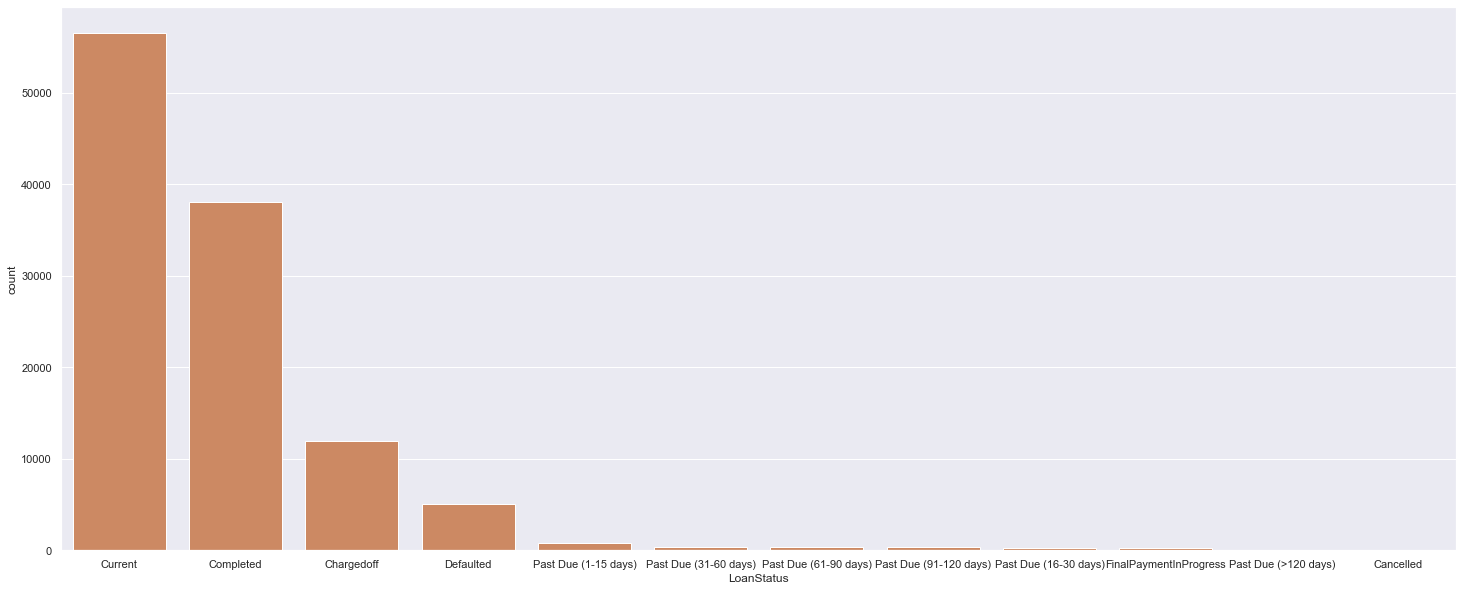

In [13]:
sns.set(rc={'figure.figsize':(25,10)})
freq=target_df['LoanStatus'].value_counts()
order=freq.index
b_color=sns.color_palette()[1]
sns.countplot(data=target_df,x='LoanStatus',color= b_color,order=order);

#### Observation 1:

- The majority of the loans in the data set are current loans.
Past-due loans are classified into numerous categories based on the length of the payment delay.
- Another significant factor is completed loans, with defaulted loans constituting a minority.

* Employment Status

<AxesSubplot:xlabel='EmploymentStatus', ylabel='count'>

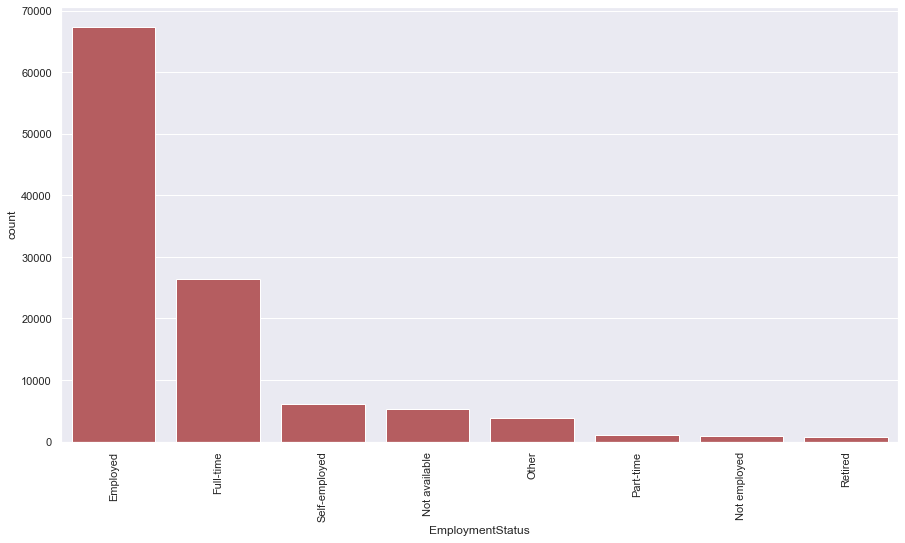

In [14]:
sns.set(rc={'figure.figsize':(15,8)})
freq=target_df.EmploymentStatus.value_counts()
color=sns.color_palette()[3]
plt.xticks(rotation=90)
order=freq.index
sns.countplot(data=target_df,x='EmploymentStatus',order=order,color=color)

#### Observation 2:

- The bulk of borrowers is employed, with all other groups accounting for a minor proportion of borrowers.
- Full-time employment is the most common in small groups, followed by self-employment and so on.

* Borrower Rate

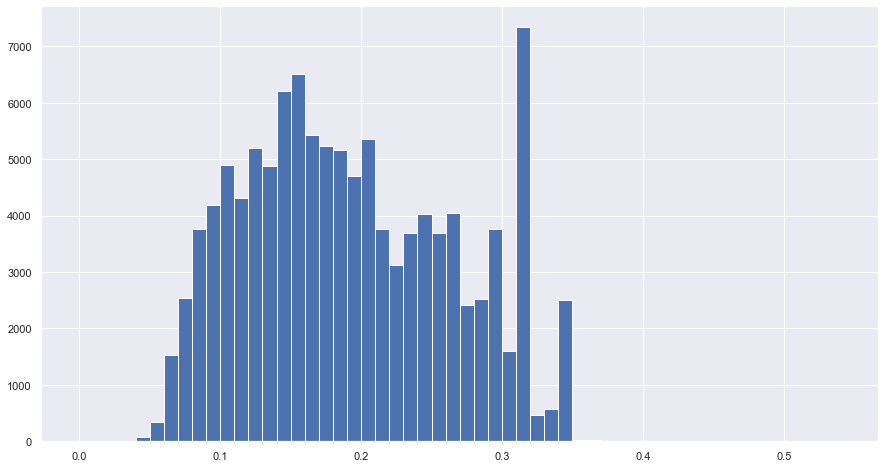

In [15]:
bins = np.arange(0, target_df.BorrowerRate.max()+0.05, 0.01)
plt.hist(target_df['BorrowerRate'],bins=bins);



- The distribution of the Borrower Rate looks multimodal. A small peak centered at 0.09, a large peak centered at 0.15. There is also a small peak centered at 0.2. Additionally, there is a very shape peak between 0.33. 

In [16]:

income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
print(boundary)
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

28043.178456412228


428

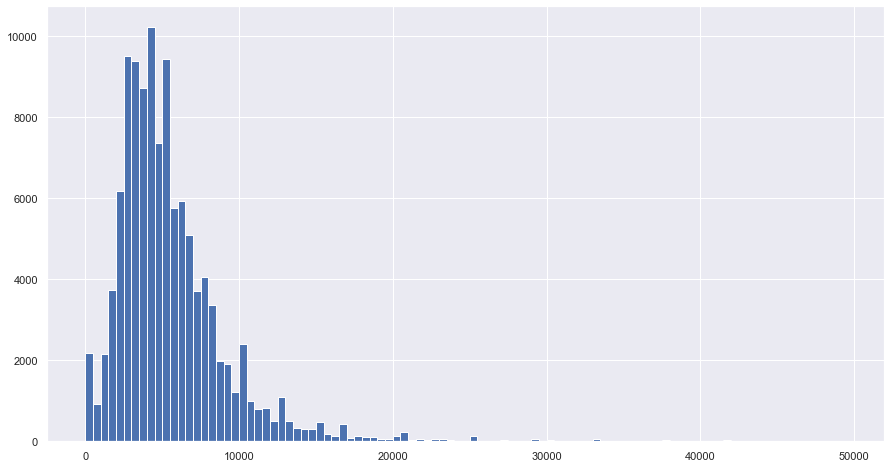

In [17]:
bins=np.arange(0,50000,500)
plt.hist(target_df.StatedMonthlyIncome,bins=bins);

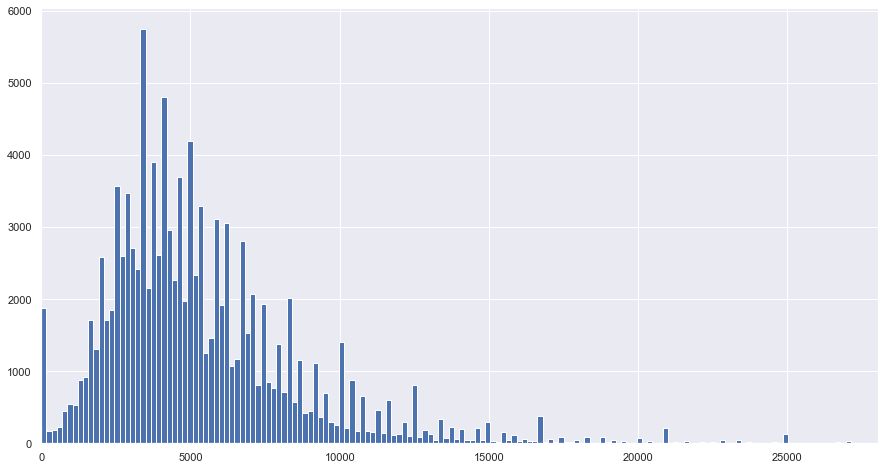

In [18]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=10000);
plt.xlim(0, boundary);

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The distribution of monthly declared income is highly awkward: there are several outliers and a wide range, but it is still skewed. The bulk of borrowers are employed, with all other groups accounting for a minor proportion of borrowers, and the majority of loans in the data set are genuinely current loans.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


- The bulk of loans are current debts. We are not interested in any existing loans because our major purpose is to establish the driving variables of loan result.

# Bivariate Exploration


In [19]:
target_df.head(1)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),LoanOriginalAmount,ProsperRating (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,Recommendations,Investors,TotalProsperLoans
0,36,Completed,0.158,NaN,9425,NaN,Self-employed,4.0,3083,0,258,0.0


In [72]:
lisst_df = (target_df.LoanStatus == 'Completed') | (target_df.LoanStatus == 'Defaulted')| (target_df.LoanStatus =='Current') | (target_df.LoanStatus == 'Chargedoff')
target_df = target_df[lisst_df]
def change_(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_, axis=1)
target_df['LoanStatus'].value_counts()

Current      56576
Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

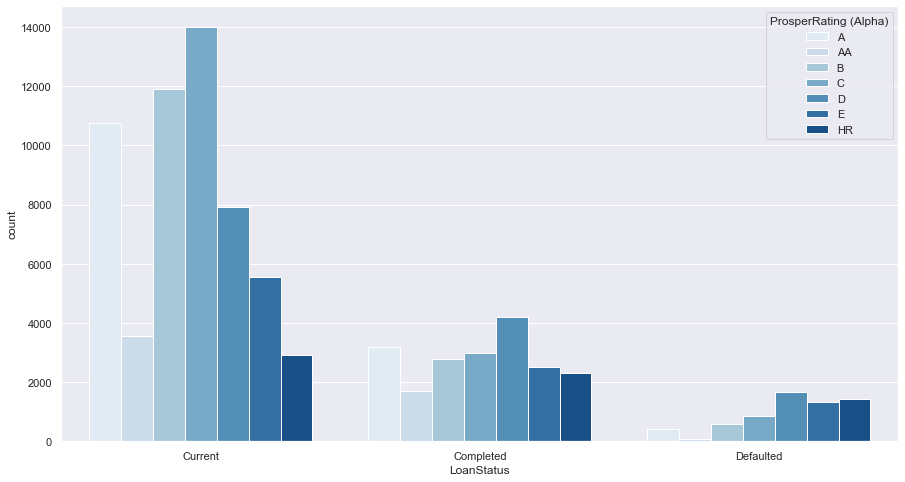

In [76]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)',palette = 'Blues')


<AxesSubplot:xlabel='LoanStatus,ProsperRating (Alpha)'>

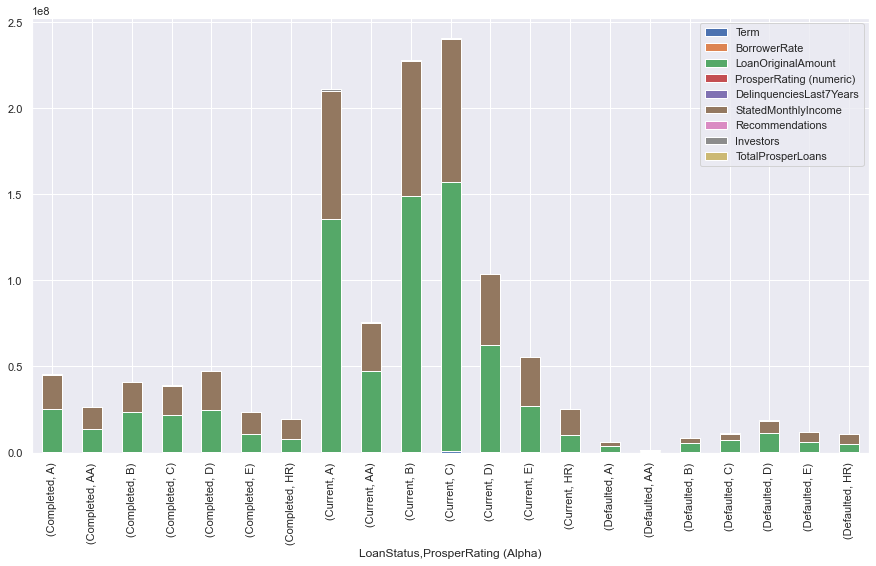

In [71]:
w = ['A','AA','B','C',
            'D','E','HR']

s = (target_df.groupby(['LoanStatus','ProsperRating (Alpha)'])
       .sum()
        )               
# plot
s.plot.bar(stacked=True)

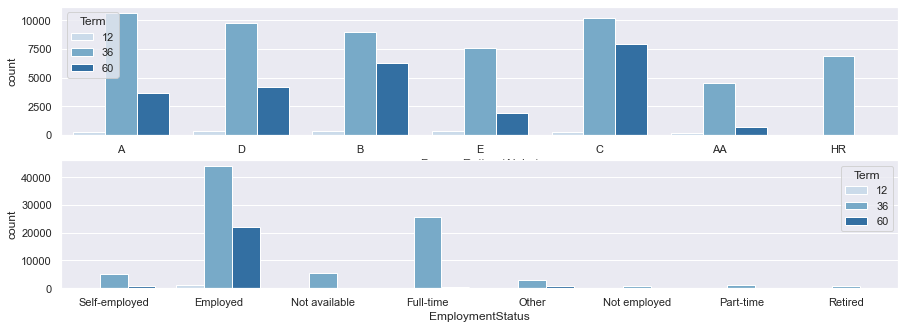

In [20]:
plt.subplot(3, 1, 1)
sns.countplot(data=target_df,x='ProsperRating (Alpha)',hue='Term',palette='Blues');
ax = plt.subplot(3, 1, 2)

sns.countplot(data = target_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues');



* There is insufficient information on part-time, retired, and unemployed borrowers for the job status variable to demonstrate how it interacts with term and Prosper rating factors. However, it is clear that word and Prosper rating interact in some way. There are proportionally more 60-month loans with B and C grades. Borrowers with HR ratings can only get loans for 36 months.

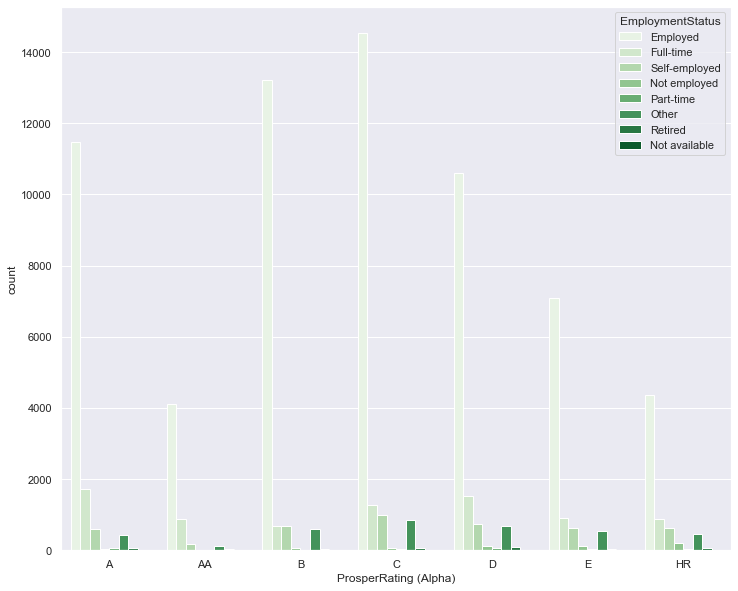

In [67]:
plt.figure(figsize = [12, 10])
sns.countplot(data = target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Greens');

* Lower ratings appear to have higher percentages of people who report being unemployed, self-employed, retired, or working part-time.

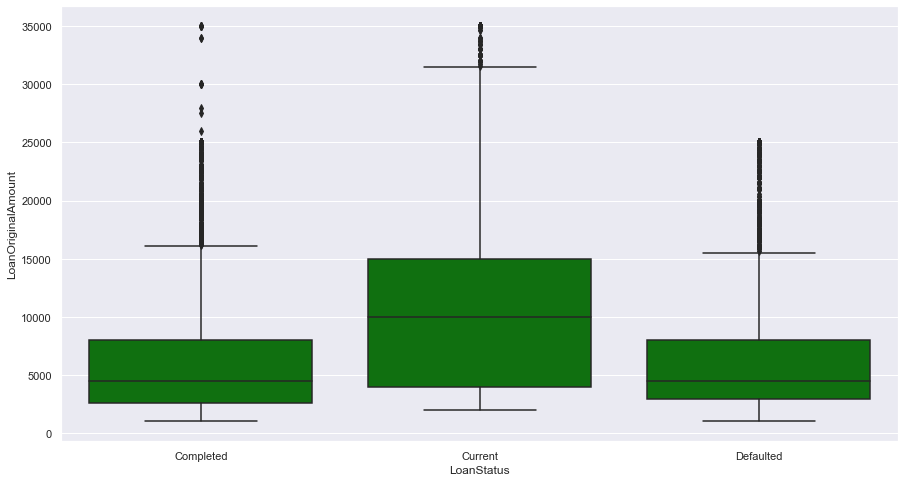

In [32]:
sns.boxplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount',color='green');


- As from Above Graph we can state that defaulted credits tend to be smaller than completed credits onces.


# Multivariate Exploration


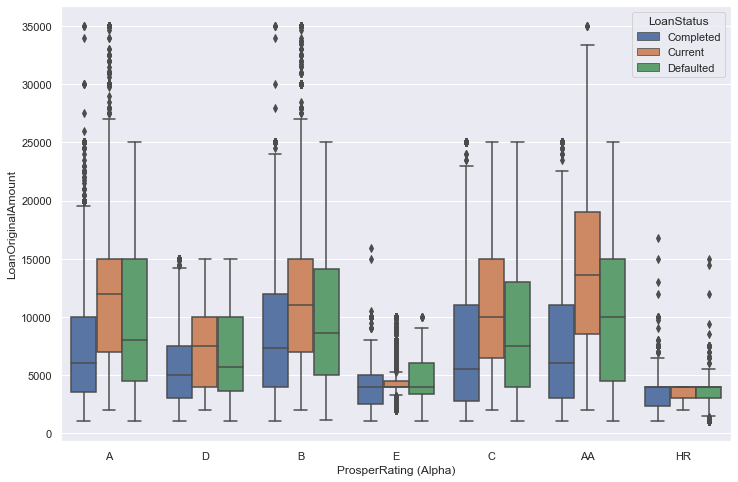

In [33]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

- Except for the lowest ratings defaulted credits tend to be larger than completed.
- Most of the defaulted credits comes from individuals with low Prosper rating

C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


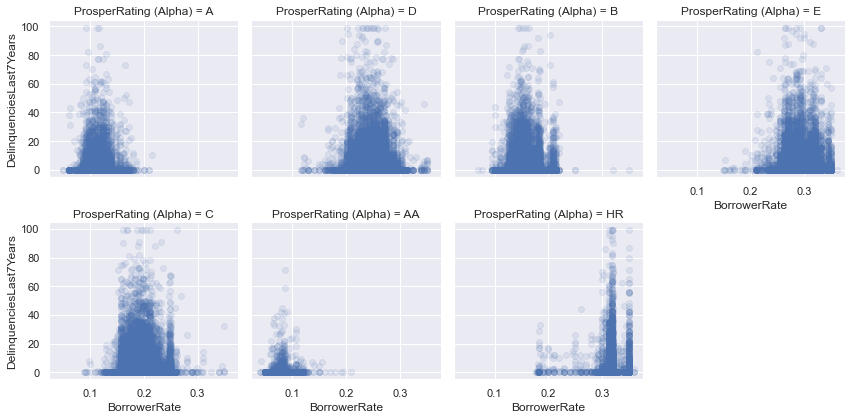

In [185]:
g = sns.FacetGrid(data = target_df, col = 'ProsperRating (Alpha)', col_wrap = 4, size = 3)
g.map(plt.scatter, 'BorrowerRate', 'DelinquenciesLast7Years', alpha = 0.1)
g.set_xlabels('BorrowerRate')
g.set_ylabels('DelinquenciesLast7Years')

plt.show()

In [187]:
target_df.LoanStatus.value_counts()

Current      56576
Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

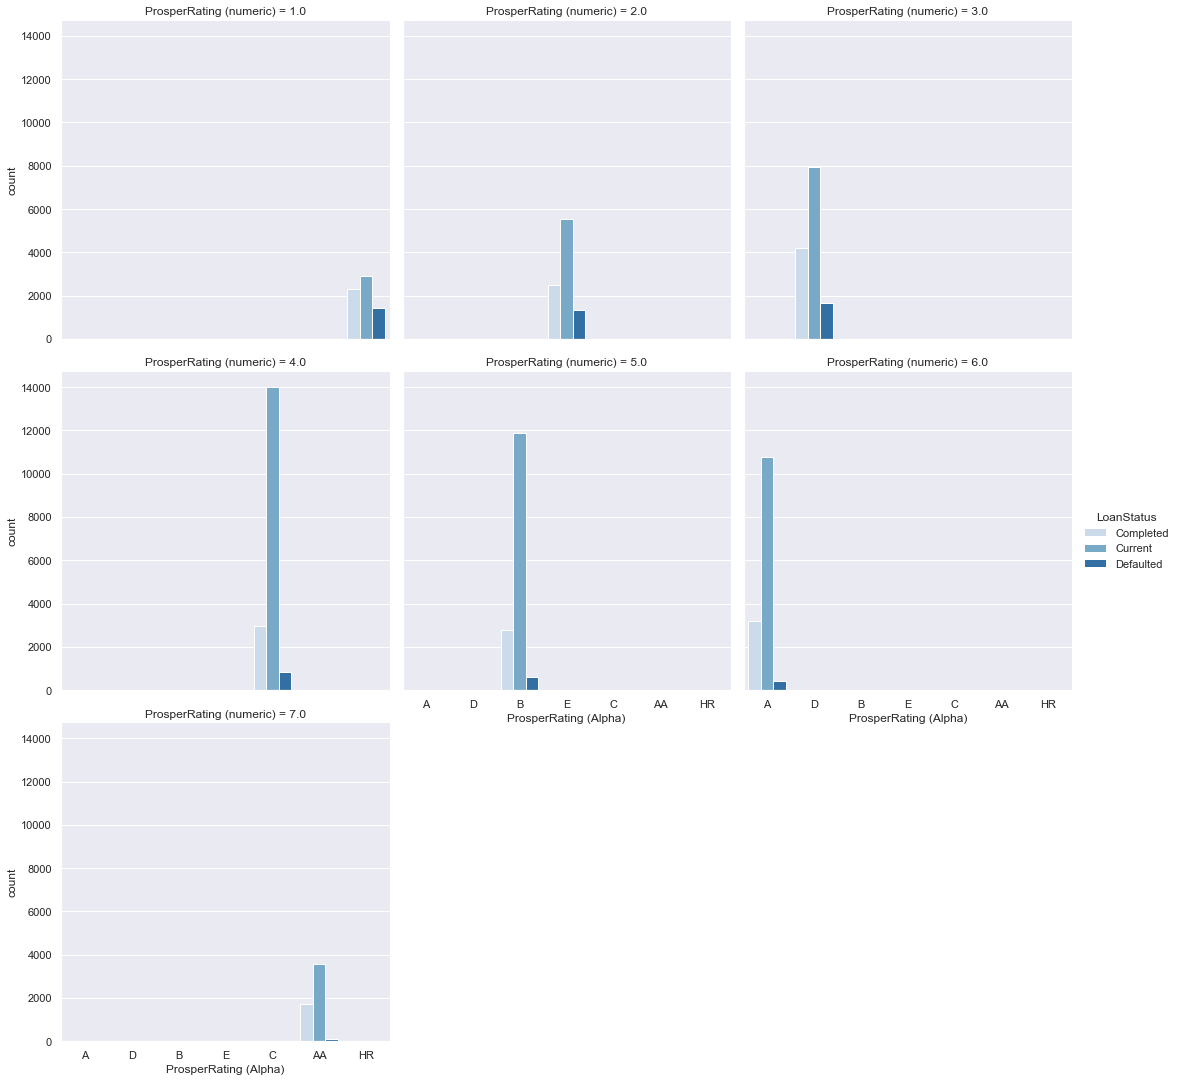

In [188]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ProsperRating (numeric)',data = target_df, kind = 'count', palette = 'Blues', col_wrap = 3);

* In addition to all of the other five graphs, the second one features several ups and downs.
* In distinct categories separated by ratings, there is no discernible variation in default rates.

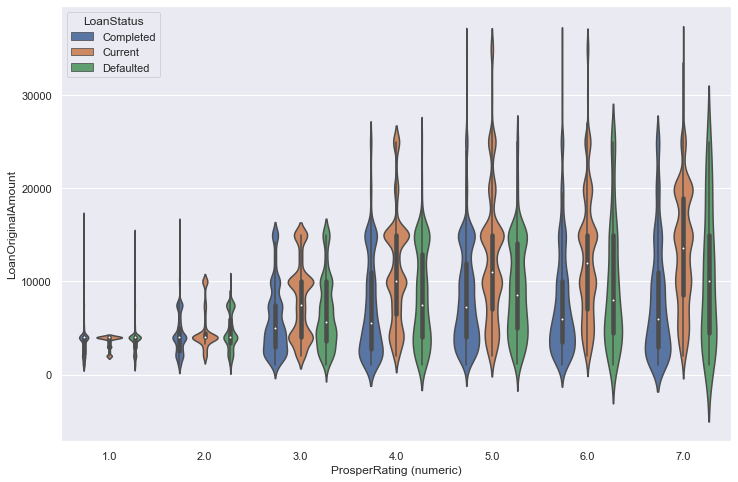

In [190]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=target_df, x='ProsperRating (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

* Business and home improvement don't have nearly equivalent means at all, with the exception of auto.
* Business-related categories typically have more.

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?



* Our first expectations were validated. The majority of defaulted credits are from people with poor Prosper ratings, and the Business category has a higher percentage.

#### Were there any interesting or surprising interactions between features?
* It was discovered that defaulted credits for people with high Prosper ratings tend to be greater than completed credits.